Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting (use %matplotlib inline).

Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.

 Ridge/ Lasso Regression (15 points)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. We have removed the categorical variables and rows with missing variables to make it easier to run the models.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity (this feature has been removed from the csv file since it is a categorical variable)

Now,

i) Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this. Print the first 5 rows of the training set after scaling. (1 point) 

ii) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from $α = 10^{10}$ to $α = 10^{−6}$.

In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen α based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric. (5 pts) 

iii) a) Run ridge and lasso regression for all of the α specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (2 points).

  b) What do you qualitatively observe when the value of the regularization parameter changes? (1 point)

iv) a) Similarly, use sklearn.linear_model.ElasticNet to do linear regression with different α values, and plot the coefficients learned for each of them (1 point).

  b) Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models. (1 point)

v) Run the following three regression models with MSE loss on the training data (2 points): 

a) linear regression without regularization 

b) linear regression with ridge regularization 

c) linear regression with lasso regularization 

For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

vi) Train the 3 models and report metrics with the original data without scaling (1 point)

vii) Why did we have to scale the data in ridge and lasso regression? (1 point)



Solution

In [129]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
from sklearn import linear_model
pd.options.mode.chained_assignment = None

df = pd.read_csv("housing_data.csv")
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']

In [2]:
df.columns # Show you all the columns in this file

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [42]:
df.head() # Show you the first 5 rows in this file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [43]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this. Print the first 5 rows of the training set after scaling

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# first 5 rows of the training set after scaling
X_train_scaled[:5]

array([[-1.13113681,  1.91091856,  1.85290292, -0.97858972, -1.04294314,
        -0.99407214, -1.05120862, -1.2222887 ],
       [-1.12615029,  0.76639279, -0.92620274,  0.19946448,  0.16877038,
         0.54845443,  0.27854331,  0.71761009],
       [ 0.70888992, -0.7004688 ,  1.85290292, -1.02423644, -1.0022334 ,
        -0.94920516, -1.03796408, -1.18162406],
       [-1.21590769,  0.62157525,  1.13827575, -0.2132003 , -0.06351462,
        -0.18915862, -0.08700602, -0.69687411],
       [ 0.86347211, -0.70981187, -0.29097859,  0.38758429,  0.07298275,
         0.27207387,  0.10371537,  0.51338795]])

ii) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from  α=1010
  to  α=10−6
 .

In [131]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score


# Define a range of alpha values
alphas = 10**np.linspace(10, -6, 100)

# Ridge regression
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv_model.alpha_
mse_scores_ridge = cross_val_score(ridge_cv_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Print the best alpha value and cross-validated MSE scores for Ridge
print(f"Best alpha (Ridge): {best_alpha_ridge}")
print("Cross-validated MSE scores (Ridge):", -mse_scores_ridge)


Best alpha (Ridge): 18.738174228603793
Cross-validated MSE scores (Ridge): [4.46455896e+09 4.94666044e+09 5.00336272e+09 4.88517935e+09
 4.98530672e+09]


In [132]:
# Lasso regression
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv_model.alpha_
mse_scores_lasso = cross_val_score(lasso_cv_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Print the best alpha value and cross-validated MSE scores for Lasso
print(f"Best alpha (Lasso): {best_alpha_lasso}")
print("Cross-validated MSE scores (Lasso):", -mse_scores_lasso)

Best alpha (Lasso): 57.22367659350197
Cross-validated MSE scores (Lasso): [4.46414211e+09 4.94718583e+09 5.00517004e+09 4.88701803e+09
 4.98546483e+09]


Run ridge and lasso regression for all of the α specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors

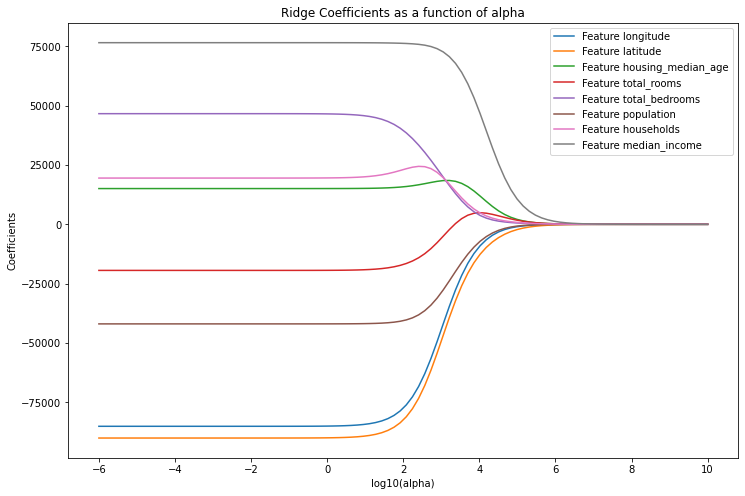

In [119]:
import matplotlib.pyplot as plt

coefs = []
for a in alphas:
    ridge_model = RidgeCV(alphas=a, scoring='neg_mean_squared_error')
    ridge_model.fit(X_train_scaled, y_train)
    coefs.append(ridge_model.coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a function of alpha')
plt.legend(['Feature ' + str(X.columns[i]) for i in range(len(X.columns))])
plt.show()

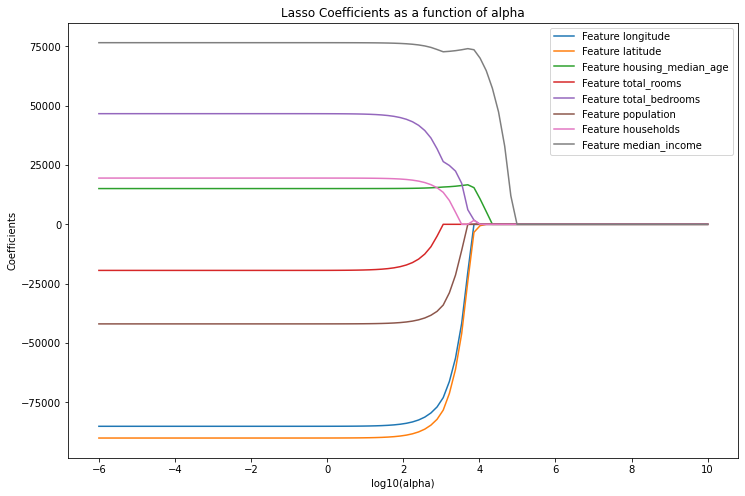

In [120]:
coefs = []
for a in alphas:
    lasso_model = LassoCV(alphas=[a], cv=5)
    lasso_model.fit(X_train_scaled, y_train)
    coefs.append(lasso_model.coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a function of alpha')
plt.legend(['Feature ' + str(X.columns[i]) for i in range(len(X.columns))])
plt.show()

What do you qualitatively observe when the value of the regularization parameter changes? (1 point)

Ans: As alpha value increase, we are penalizing the complexity of the model , the model becomes simpler with coefficients getting closer to 0. In Ridge, coefficients becomes smaller but not 0 unlike Lasso, where some of the coefficient parameters become zero

iv) a) Similarly, use sklearn.linear_model.ElasticNet to do linear regression with different α values, and plot the coefficients learned for each of them (1 point).

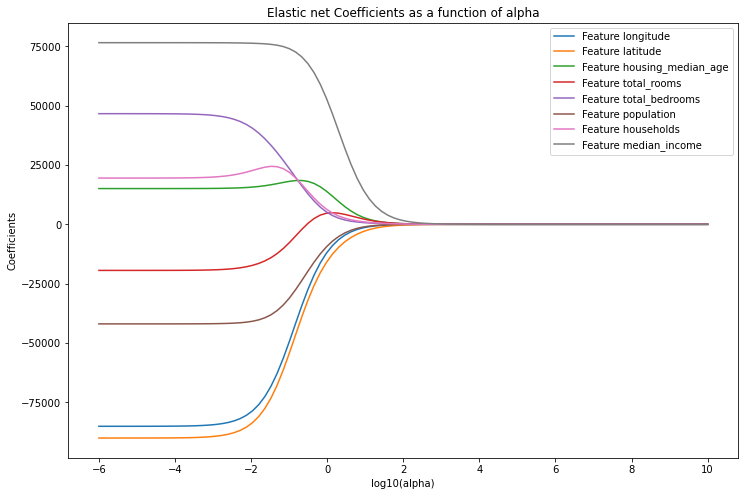

In [121]:
from sklearn.linear_model import ElasticNetCV

# Elastic Net regression
elastic_net_model = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
elastic_net_model.fit(X_train_scaled, y_train)
best_alpha_elastic_net = elastic_net_model.alpha_
best_l1_ratio_elastic_net = elastic_net_model.l1_ratio_
best_alpha_elastic_net
best_l1_ratio_elastic_net

coefs = []
for a in alphas:
    elastic_net_model = ElasticNetCV(alphas=[a],l1_ratio=[0.5], cv=5)
    elastic_net_model.fit(X_train_scaled, y_train)
    coefs.append(elastic_net_model.coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Elastic net Coefficients as a function of alpha')
plt.legend(['Feature ' + str(X.columns[i]) for i in range(len(X.columns))])
plt.show()

Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models. 

Ridge Regression:
Pros:
Shrinks Coefficients: Ridge regression shrinks the coefficients toward zero, but it doesn't force them to be exactly zero.
Cons:
Doesn't Perform Variable Selection: Ridge doesn't perform variable selection, meaning it keeps all features in the model, which might be undesirable if some features are irrelevant.

Lasso Regression:
Pros:
Variable Selection: Lasso can lead to sparse models by setting some coefficients to exactly zero, effectively performing feature selection.
Cons:
May Over-Penalize: Lasso can sometimes over-penalize coefficients, particularly when features are highly correlated, leading to some coefficients being set to zero unnecessarily.

Elastic Net Regression:
Pros:
Combines Ridge and Lasso: Elastic Net combines the strengths of both Ridge and Lasso, allowing for variable selection
Cons:
Complexity: Elastic Net introduces an additional hyperparameter (α), which needs to be tuned, adding complexity to the model selection process.

Run the following three regression models with MSE loss on the training data (2 points):

a) linear regression without regularization

b) linear regression with ridge regularization

c) linear regression with lasso regularization

For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

In [133]:
#Linear regression 

# Ridge regression
from sklearn.linear_model import LinearRegression
lrp = LinearRegression().fit(X_train_scaled, y_train)  # Fit with the transformed training data
Y_train_pred = lrp.predict(X_train)
MAE_train = mean_squared_error(y_train, Y_train_pred)

print(f'Linear REgression without regularization training MSE is {MAE_train}')

print(f'Ridge REgression training MSE is {-mse_scores_ridge.mean()}')#mse_scores_ridge

print(f'Lasso REgression training MSE is {-mse_scores_lasso.mean()}')#mse_scores_ridge

Linear REgression without regularization training MSE is 8356952358075262.0
Ridge REgression training MSE is 4857013637.753325
Lasso REgression training MSE is 4857796168.168422


C:\Users\I068117\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  raise ValueError(


In [134]:
from sklearn.metrics import r2_score

test_predictions = lrp.predict(X_test_scaled)
MSE_linear = mean_squared_error(y_test,test_predictions)
# Calculate R-squared (R2) score
r2_linear = r2_score(y_test, test_predictions)
print(f'Linear Regression test R2 score is {r2_linear}')
print(f'Linear Regression test MSE is {MSE_linear}')#mse_scores_ridge

test_predictions = ridge_cv_model.predict(X_test_scaled)
MSE_ridge = mean_squared_error(y_test,test_predictions)
# Calculate R-squared (R2) score
r2_ridge = r2_score(y_test, test_predictions)
print(f'Ridge Regression test R2 score is {r2_ridge}')
print(f'Ridge Regression test MSE is {MSE_ridge}')#mse_scores_ridge

test_predictions = lasso_cv_model.predict(X_test_scaled)
MSE_lasso = mean_squared_error(y_test,test_predictions)
r2_lasso = r2_score(y_test, test_predictions)
print(f'Lasso Regression test R2 score is {r2_lasso}')
print(f'Lasso Regression test MSE is {MSE_lasso}')#mse_scores_ridge

Linear Regression test R2 score is 0.6384697484766777
Linear Regression test MSE is 4861014374.694437
Ridge Regression test R2 score is 0.6383514467242566
Ridge Regression test MSE is 4862605020.336531
Lasso Regression test R2 score is 0.6384660274407853
Lasso Regression test MSE is 4861064406.493671


Train the 3 models and report metrics with the original data without scaling (1 point)

In [135]:
#Linear regression 
from sklearn.linear_model import LinearRegression
lrp = LinearRegression().fit(X_train, y_train)  # Fit with the transformed training data
Y_train_pred = lrp.predict(X_train)
MAE_train = mean_squared_error(y_train, Y_train_pred)

print(f'Linear REgression without regularization training MSE is {MAE_train}')

# Ridge regression
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X_train, y_train)
mse_scores_ridge = cross_val_score(ridge_cv_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(f'Ridge REgression training MSE is {-mse_scores_ridge.mean()}')#mse_scores_ridge
test_predictions = ridge_cv_model.predict(X_test)
MSE_ridge = mean_squared_error(y_test,test_predictions)
r2_ridge = r2_score(y_test, test_predictions)

print(f'Ridge REgression test MSE is {MSE_ridge}')#mse_scores_ridge
print(f'Ridge Regression R2 score is {r2_ridge}')

# Lasso regression
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train, y_train)
mse_scores_lasso = cross_val_score(lasso_cv_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(f'Lasso REgression training MSE is {-mse_scores_lasso.mean()}')#mse_scores_ridge

test_predictions = lasso_cv_model.predict(X_test)
MSE_lasso = mean_squared_error(y_test,test_predictions)
r2_lasso = r2_score(y_test, test_predictions)

print(f'Lasso REgression test MSE is {MSE_lasso}')#mse_scores_ridge
print(f'Lasso Regression R2 score is {r2_lasso}')

Linear REgression without regularization training MSE is 4831534611.158461
Ridge REgression training MSE is 4856718738.61366
Ridge REgression test MSE is 4861098244.561237
Ridge Regression R2 score is 0.6384635107880592
Lasso REgression training MSE is 4856734903.233295
Lasso REgression test MSE is 4861014374.698977
Lasso Regression R2 score is 0.63846974847634


 Why did we have to scale the data in ridge and lasso regression? (1 point)

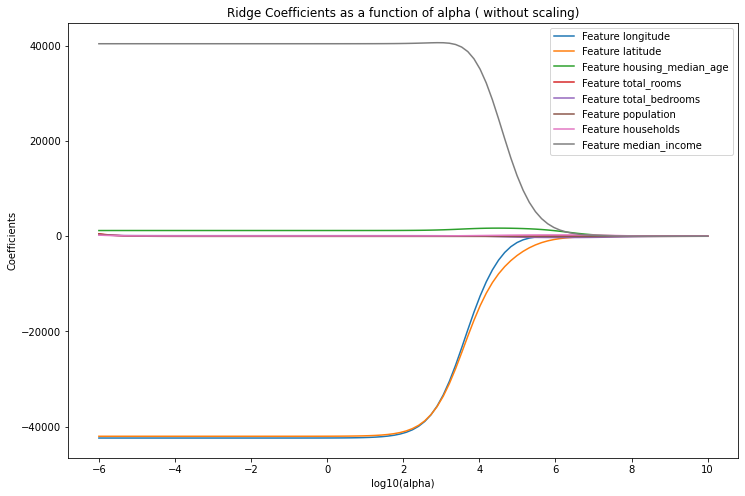

In [136]:
import matplotlib.pyplot as plt

coefs = []
for a in alphas:
    ridge_model = RidgeCV(alphas=a, scoring='neg_mean_squared_error')
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a function of alpha ( without scaling)')
plt.legend(['Feature ' + str(X.columns[i]) for i in range(len(X.columns))])
plt.show()

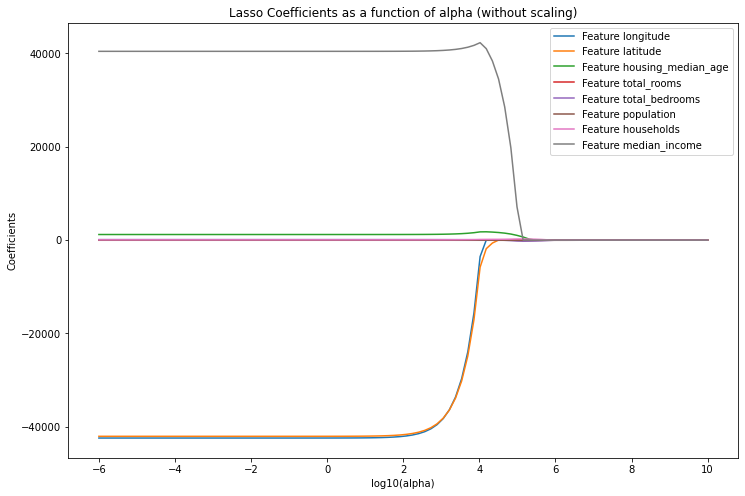

In [137]:
coefs = []
for a in alphas:
    lasso_model = LassoCV(alphas=[a], cv=5)
    lasso_model.fit(X_train, y_train)
    coefs.append(lasso_model.coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a function of alpha (without scaling)')
plt.legend(['Feature ' + str(X.columns[i]) for i in range(len(X.columns))])
plt.show()

We need to standardize unless the variables are all already on the same scale (but then the effect of the regularization parameter will depend on that scale).

If you don't standardize, the coefficients with the smaller-scale units will be much larger but the regularization won't adjust for that effect, penalizing the coefficients that go with small-units more (vastly more in this case) as we can see the coefficients for smaller scales are penalised more and are closer to the 0